In [1]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
with tf.device('/GPU:0'):
               a = tf.constant([[1.0,2.0,3.0]])
               b = tf.constant([[1.0], [2.0], [3.0]])
               result = tf.matmul(a, b)
print(result)

tf.Tensor([[14.]], shape=(1, 1), dtype=float32)


In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
print(tf.test.gpu_device_name())
print("Num GPUs Available: ",len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)


Num GPUs Available:  0
2.17.0


In [4]:
data_dir = 'C:/Users/mauli/Desktop/SOIL CLASSIFICATION DATA/MAIN/train'

In [5]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,
    horizontal_flip = False,
    zoom_range = 0.2,
    shear_range = 0.2,
)

train_generator =datagen.flow_from_directory(
    data_dir,
    target_size = (224, 224),
    batch_size =32,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size = (224, 224),
    batch_size =32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 6146 images belonging to 8 classes.
Found 1532 images belonging to 8 classes.


In [6]:
 # Load the DenseNet121 model without the top fully connected layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

In [7]:
# Add custom layers on top of the base model
model = models.Sequential([
    base_model,  

    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(8, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_generator,
        epochs=100,  # You can adjust the number of epochs
        validation_data=validation_generator
    )

Epoch 1/100


C:\Users\mauli\Desktop\python_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 647s 3s/step - accuracy: 0.6550 - loss: 6.6358 - val_accuracy: 0.8388 - val_loss: 0.6669
Epoch 2/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 507s 3s/step - accuracy: 0.8899 - loss: 0.3682 - val_accuracy: 0.8440 - val_loss: 0.6925
Epoch 3/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 505s 3s/step - accuracy: 0.9173 - loss: 0.2738 - val_accuracy: 0.8584 - val_loss: 0.6826
Epoch 4/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 521s 3s/step - accuracy: 0.9231 - loss: 0.2495 - val_accuracy: 0.8244 - val_loss: 0.7916
Epoch 5/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 523s 3s/step - accuracy: 0.9235 - loss: 0.2331 - val_accuracy: 0.8577 - val_loss: 0.6988
Epoch 6/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 503s 3s/step - accuracy: 0.9406 - loss: 0.1784 - val_accuracy: 0.8753 - val_loss: 0.7366
Epoch 7/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 516s 3s/step - accuracy: 0.9370 - loss: 0.1951 - val_accuracy: 0.8531 - val_loss: 0.6465
Epoch 8/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 515s 3s/step - accuracy: 0.9506 - loss: 0.1600 - val_accuracy

In [10]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy:.2f}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8997 - loss: 1.0527
Validation Accuracy: 0.90


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("crop_production_dataset_content.csv")
df.head(10)

,District,Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha)
0,West District,Alluvial,6.17,2.05,34.42,15.20,23.81
1,North District,Alluvial,7.42,1.56,43.19,10.24,18.71
2,South District,Alluvial,7.26,2.90,41.89,10.44,22.79
3,West District,Loamy,6.92,2.50,40.58,15.49,20.07
4,South District,Loamy,7.26,2.86,42.98,15.13,21.37
5,South District,Alluvial,6.88,2.67,42.24,14.98,23.44
6,East District,Alluvial,6.29,2.65,43.01,16.31,23.47
7,West District,Clayey,7.40,2.89,42.90,14.27,23.37
8,East District,Clayey,6.84,1.94,40.25,16.00,23.43
9,East District,Sandy,6.57,2.17,37.00,15.25,22.48


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image to match model's input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale to match training data normalization
    return img_array

def classify_image(model, img_path, class_indices):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    class_label = {v: k for k, v in class_indices.items()}[predicted_class]  # Convert index to class name
    return class_label, predictions[0]

img_path = 's.jpg'
class_indices = train_generator.class_indices  # Mapping of classes to indices
class_label, prediction = classify_image(model, img_path, class_indices)

print(f"Predicted Class: {class_label}")
print("Prediction Probabilities:", prediction)

model.save('cnn_saved_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Predicted Class: Alluvial soil
Prediction Probabilities: [1.00000000e+00 7.29007466e-10 1.40449465e-08 1.15692531e-18
 4.83362406e-10 1.62596076e-12 5.52065511e-22 2.01296181e-24]


193/193 ━━━━━━━━━━━━━━━━━━━━ 418s 2s/step


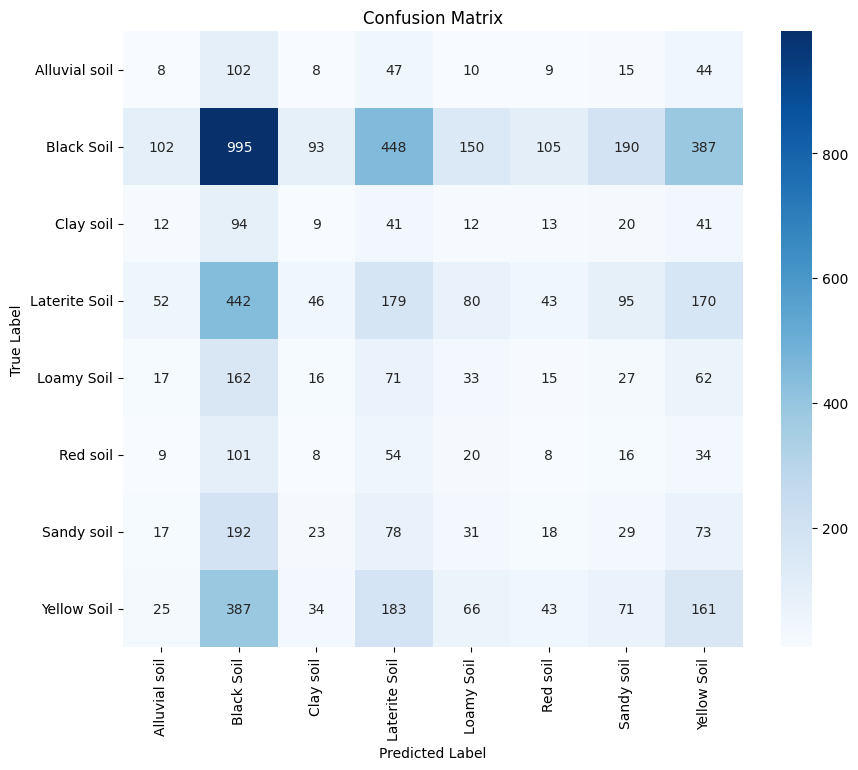

Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.03      0.03       243
           1       0.40      0.40      0.40      2470
           2       0.04      0.04      0.04       242
           3       0.16      0.16      0.16      1107
           4       0.08      0.08      0.08       403
           5       0.03      0.03      0.03       250
           6       0.06      0.06      0.06       461
           7       0.17      0.17      0.17       970

    accuracy                           0.23      6146
   macro avg       0.12      0.12      0.12      6146
weighted avg       0.23      0.23      0.23      6146



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assume `model` is your trained model and `test_generator` is the data generator for the test set
# 1. Predict the labels on the test set
y_pred = model.predict(train_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class indices
y_true = train_generator.classes  # True labels from the test generator

# 2. Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# 3. Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 4. Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

In [1]:
model.save('cnn_saved_model_tf', save_format='tf')

NameError: name 'model' is not defined